# Lawn Mower: Implement Double Q-learning

In [ ]:
# import cv2
import gym as gym
from gym import spaces
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import optuna


Double Q-learning is an off-policy reinforcement learning algorithm. It has many similarities with SARSA. Double Q-learning maintains two Q-tables. The algorithm involves taking action in the current state, observing the reward and next state, and updating the Q-value estimate of the previous state-action pair in Table-A based on the maximum expected Q-value of the next state in Table-B. It switches between the tables during the learning process.

#### STEP 1
Apply Double Q-learning algorithm to solve the environment that was defined in Part I. You can modify your code from Part II.

In [ ]:
env = MyLawn()
epsilon = 1.0  
epsilon_min = 0.01  
gamma = 0.95 
alpha = 0.15 
decay_rate = 0.995  
total_episodes = 1000
max_timestamp = 10

qt1 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 1 initialization
qt2 = np.zeros((env.obs_space.n, env.action_space.n))  # Q-table 2 initialization

rewards_epi = []
epsilon_values = []
steps_per_episode = []
penalties_per_episode = []

final_state = None

for episode in range(total_episodes):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_rewards = 0
    total_steps = 0

    while True:
        total_steps += 1
        action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_strt_idx = env.obs_space_to_index(next_state)
        if np.random.uniform(0, 1) < 0.5:
            qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
        else:
            qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])
        state_index = next_strt_idx
        total_rewards += reward
        if terminated or truncated or total_steps >= max_timestamp:
            break

    penalties_per_episode.append(env.get_penalty_count())
    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}")
        print("Q-table 1:")
        print(qt1)
        print("Q-table 2:")
        print(qt2)
        avg_penalty = np.mean(penalties_per_episode[-100:])
        print(f"Average Penalties in Last 100 Episodes: {avg_penalty}")

    epsilon = max(epsilon_min, epsilon * decay_rate)
    epsilon_values.append(epsilon)
    rewards_epi.append(total_rewards)
    steps_per_episode.append(total_steps)

    if (episode + 1) % 100 == 0:
        average_steps = np.mean(steps_per_episode[-100:])
        print(f"Episode: {episode + 1}, Average Steps: {average_steps}")

    if episode == total_episodes - 1:
        final_state = env.state

Episode: 100
Q-table 1:
[[ 8.40617156e+00  1.06788449e+01  1.34207822e+01  9.13034518e+00]
 [ 2.03343807e+00  7.54130659e+00  1.35738533e+01  6.74309387e+00]
 [ 1.58370720e+00  3.80373599e+00  1.52914268e+01  2.93634507e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.93380676e+00  3.54829620e+00  1.32324352e+00  5.75602278e-01]
 [ 9.05654452e-01  2.87268974e+00  1.57858271e+00 -1.26491411e-01]
 [ 2.39179808e+00 -2.77500000e-01  1.45827927e+00 -1.55812384e-01]
 [ 1.09905012e+01  3.58372605e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.11986304e-01 -2.21151040e-01  2.40436628e+00 -1.11419844e+00]
 [ 1.10742702e+00 -1.68125555e-01  1.52702228e+00 -3.94283106e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.50000000e-02  0.00000000e+00  0.00000000e+00 -1.31579062e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.01318437e-02 -2.22399391e-01  0.0

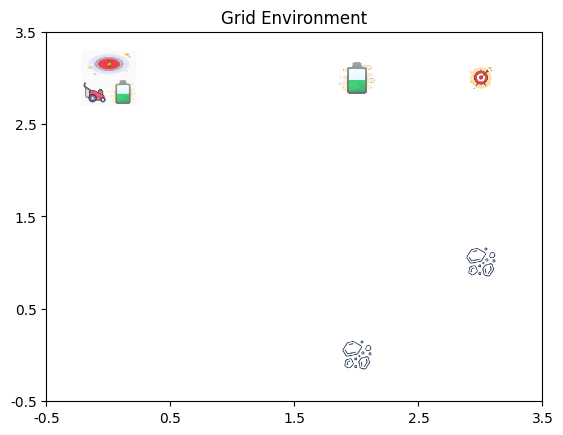

In [ ]:
env.state = final_state
env.render()

#### STEP 2

Provide the evaluation results:
- Print the initial Q-tables and the trained Q-tables.
- Plot the total reward per episode graph (x-axis: episode, y-axis: total reward per episode).
- Plot the epsilon decay graph (x-axis: episode, y-axis: epsilon value)
- Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learned policy. Include a plot of the total reward per episode.

In [ ]:
print("Trained Q-table 1:")
print(qt1)
print("Trained Q-table 2:")
print(qt2)

Trained Q-table 1:
[[ 6.83981884e+01  8.09132391e+01  8.36755741e+01  7.63359833e+01]
 [ 3.85421682e+01  5.23848510e+01  8.07786252e+01  4.34273168e+01]
 [ 2.78350217e+01  6.58828656e+01  8.36648238e+01  5.20490177e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.50307932e+01  6.06983589e+01  1.10347637e+01  5.75602278e-01]
 [ 3.60057802e+00  5.83941186e+01  3.91609874e+00  3.11167087e+00]
 [ 1.34684638e+01  6.33693518e+00  4.98802604e+01  2.67137436e+00]
 [ 8.24392526e+01  8.79975389e+00  2.38981960e+01  1.69354427e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.33859471e+00 -2.21151040e-01  1.66946479e+01  2.84048081e+00]
 [ 2.95986567e+00  1.58132744e+00  3.35352283e+01 -1.90432541e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.50000000e-02  3.02565787e+00  0.00000000e+00 -1.31579062e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.01318437e-02 -2.81167245e-01  6.489244

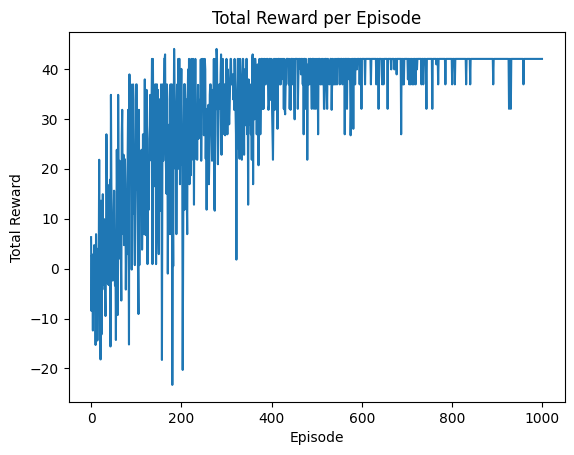

In [ ]:
plt.plot(rewards_epi)
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

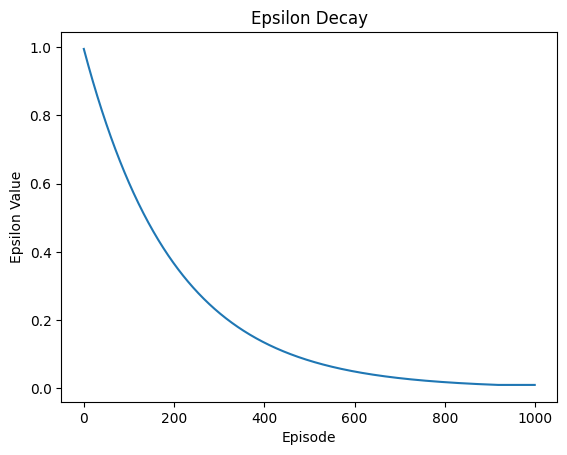

In [ ]:
plt.plot(epsilon_values)
plt.title('Epsilon Decay')
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.show()

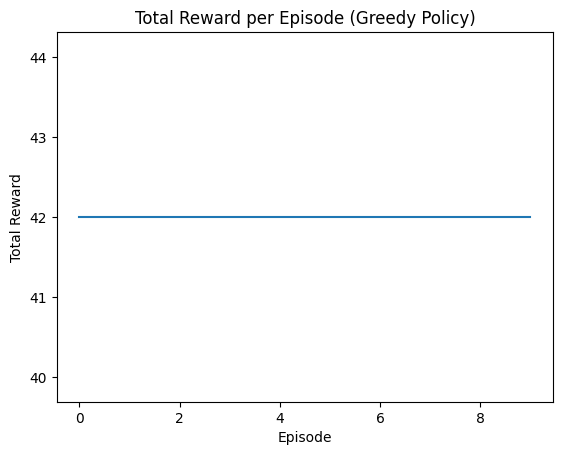

In [ ]:
greedy_rewards = []
for _ in range(10):
    state, _ = env.reset()
    state_index = env.obs_space_to_index(state)
    total_greedy_rewards = 0
    while True:
        action = np.argmax((qt1[state_index] + qt2[state_index]) / 2)
        next_state, reward, terminated, truncated, _ = env.step(action)
        state_index = env.obs_space_to_index(next_state)
        total_greedy_rewards += reward

        if terminated or truncated:
            break

    greedy_rewards.append(total_greedy_rewards)

plt.plot(greedy_rewards)
plt.title('Total Reward per Episode (Greedy Policy)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [ ]:
performance_dict = {}

def training_loop(env, g , max_timestamp):
    gamma = g  # Discount factor
    max_timestamp = max_timestamp
    epsilon = 1.0  
    epsilon_min = 0.01
    alpha = 0.15 
    decay_rate = 0.995 
    total_episodes = 1000

    qt1 = np.zeros((env.obs_space.n, env.action_space.n))
    qt2 = np.zeros((env.obs_space.n, env.action_space.n))
    rewards_epi = []
    epsilon_values = []
    steps_per_episode = []
    penalties_per_episode = []
    final_state = None
    
    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0
        total_steps = 0
        while True:
            total_steps += 1
            action = env.action_space.sample() if np.random.uniform(0, 1) < epsilon else np.argmax((qt1[state_index] + qt2[state_index]) / 2)
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_strt_idx = env.obs_space_to_index(next_state)
            if np.random.uniform(0, 1) < 0.5:
                qt1[state_index, action] += alpha * (reward + gamma * qt2[next_strt_idx, np.argmax(qt1[next_strt_idx])] - qt1[state_index, action])
            else:
                qt2[state_index, action] += alpha * (reward + gamma * qt1[next_strt_idx, np.argmax(qt2[next_strt_idx])] - qt2[state_index, action])

            state_index = next_strt_idx
            total_rewards += reward

            if terminated or truncated or total_steps >= max_timestamp:
                break

        penalties_per_episode.append(env.get_penalty_count())
        epsilon = max(epsilon_min, epsilon * decay_rate)
        epsilon_values.append(epsilon)
        rewards_epi.append(total_rewards)
        steps_per_episode.append(total_steps)

        if episode == total_episodes - 1:
            final_state = env.state

    avg_penalty = np.mean(penalties_per_episode[-100:])
    average_steps = np.mean(steps_per_episode[-100:])
    performance_dict[(gamma, max_timestamp)] = np.mean(rewards_epi[-100:])
    return rewards_epi, epsilon_values, avg_penalty, average_steps, qt1, qt2, final_state

In [ ]:
def evaluate_loop(env, max_timestamp, gamma, qt1, qt2, rewards_epi, epsilon_values, final_state):
    print(f"Evaluation for gamma={gamma}, max_timestamp={max_timestamp}")

    print("Trained Q-table 1:")
    print(qt1)
    print("Trained Q-table 2:")
    print(qt2)

    plt.figure(figsize=(10, 5))
    plt.plot(rewards_epi)
    plt.title('Total Reward per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(epsilon_values)
    plt.title('Epsilon Decay')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.grid(True)
    plt.show()

    total_episodes = 10  
    greedy_rewards = []
    for episode in range(total_episodes):
        state, _ = env.reset()
        state_index = env.obs_space_to_index(state)
        total_rewards = 0

        while True:
            action = np.argmax((qt1[state_index] + qt2[state_index]) / 2)  # Greedy action
            next_state, reward, terminated, truncated, _ = env.step(action)
            state_index = env.obs_space_to_index(next_state)
            total_rewards += reward

            if terminated or truncated:
                print(f"Episode {episode + 1} Reward: {round(total_rewards, 4)}")
                break

        greedy_rewards.append(total_rewards)
    average_reward = np.mean(greedy_rewards)    
    print(f"Average Reward over {total_episodes} episodes: {average_reward}")

    env.state = final_state
    env.render()

    plt.plot(greedy_rewards)
    plt.title('Total Reward per Episode (Greedy Policy)')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

Training for gamma=0.9, max_timestamp=12
Average Reward: 42.5136
Average Penalties: 0.0
Average Steps: 12.0
Evaluation for gamma=0.9, max_timestamp=12
Trained Q-table 1:
[[ 3.22722066e+01  4.13886779e+01  4.34531864e+01  3.87109025e+01]
 [ 1.89714838e+01  2.76841088e+01  4.05271154e+01  2.79784841e+01]
 [ 2.70299107e+01  3.49160587e+01  4.37594888e+01  2.82786366e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.33196619e+00  1.12768202e+01  2.29585290e+01  9.94059563e-01]
 [ 6.15392807e+00  1.44586118e+01  3.00402625e+01  2.36076460e-01]
 [ 3.85891758e+01  1.61113615e+01  1.77984765e+01  2.67928587e-05]
 [ 4.41103011e+01  1.65849077e+01  1.20606576e+01  9.95049265e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.34380063e+00  2.62342810e+00  1.90896495e+01  1.14985914e+01]
 [ 4.69146035e+00  1.18770044e+01  4.18498693e+01  4.99622224e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.91684032e-02 -1.33288

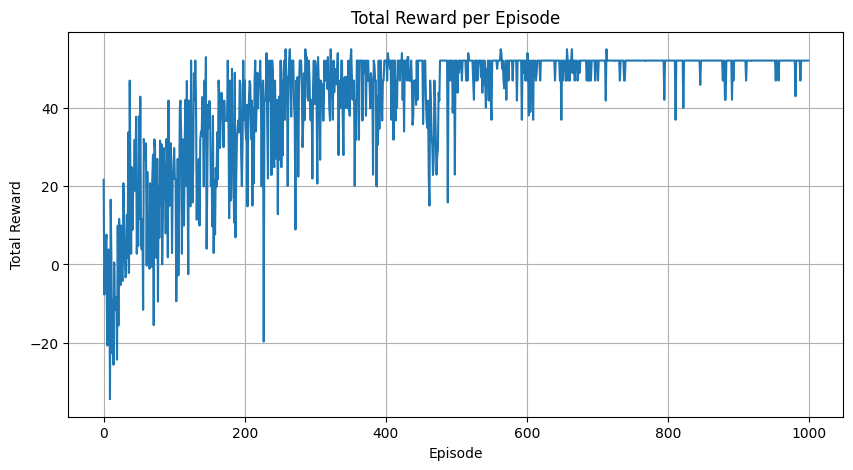

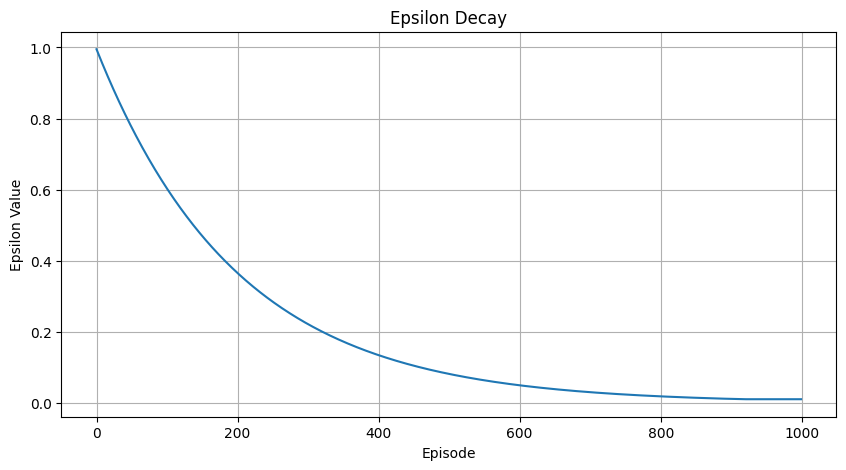

Episode 1 Reward: 52
Episode 2 Reward: 52
Episode 3 Reward: 52
Episode 4 Reward: 52
Episode 5 Reward: 52
Episode 6 Reward: 52
Episode 7 Reward: 52
Episode 8 Reward: 52
Episode 9 Reward: 52
Episode 10 Reward: 52
Average Reward over 10 episodes: 52.0


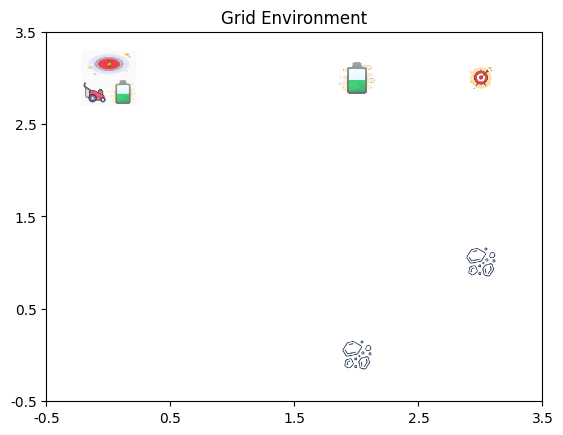

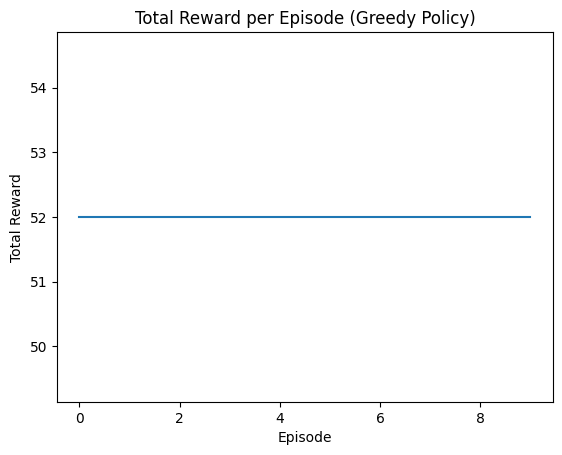

Training for gamma=0.9, max_timestamp=15
Average Reward: 54.84539999999999
Average Penalties: 0.0
Average Steps: 15.0
Evaluation for gamma=0.9, max_timestamp=15
Trained Q-table 1:
[[ 3.84494869e+01  4.24833073e+01  4.46133789e+01  3.94878376e+01]
 [ 1.86080375e+01  2.89434871e+01  4.12475180e+01  3.12778551e+01]
 [ 2.54500129e+01  3.33930779e+01  4.48209580e+01  3.06504114e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.06091612e+00  3.32553271e+01  4.56574716e+00  4.30274985e+00]
 [ 5.95237430e+00  8.39008819e+00  2.53380954e+01  5.15425458e+00]
 [ 3.51181720e+01  1.01464013e+01  1.60754024e+01  2.60678265e+00]
 [ 3.02762720e+01  4.42982122e+01  2.27509732e+01  9.96271642e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.46002932e+00  3.80365109e-01  2.71424102e+01 -1.63272020e+00]
 [ 1.02676472e+01  8.87104662e+00  4.01989383e+01  5.37009266e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+0

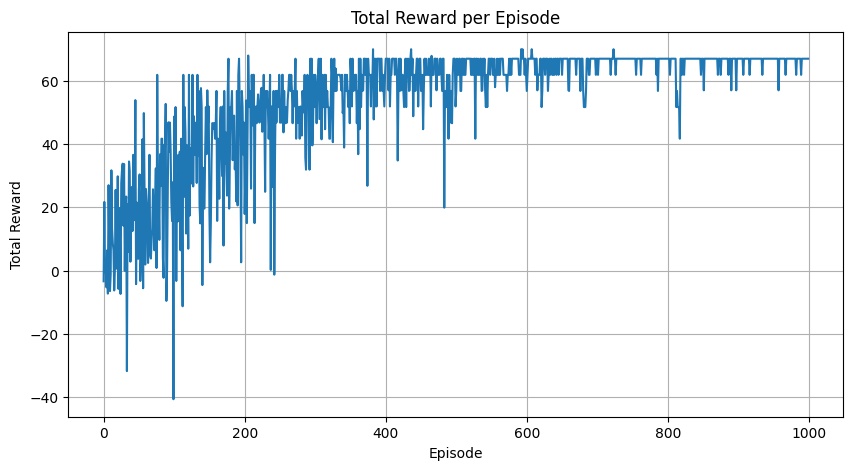

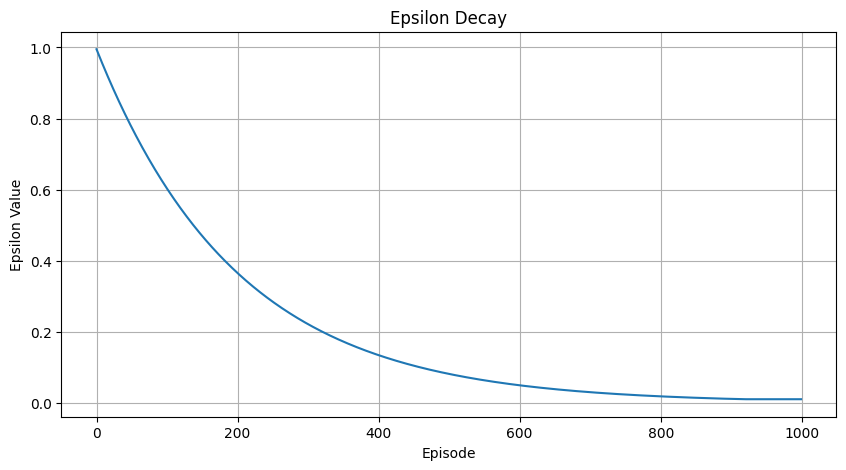

Episode 1 Reward: 67
Episode 2 Reward: 67
Episode 3 Reward: 67
Episode 4 Reward: 67
Episode 5 Reward: 67
Episode 6 Reward: 67
Episode 7 Reward: 67
Episode 8 Reward: 67
Episode 9 Reward: 67
Episode 10 Reward: 67
Average Reward over 10 episodes: 67.0


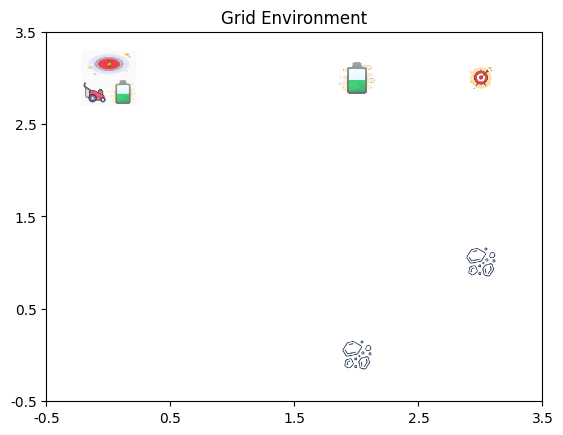

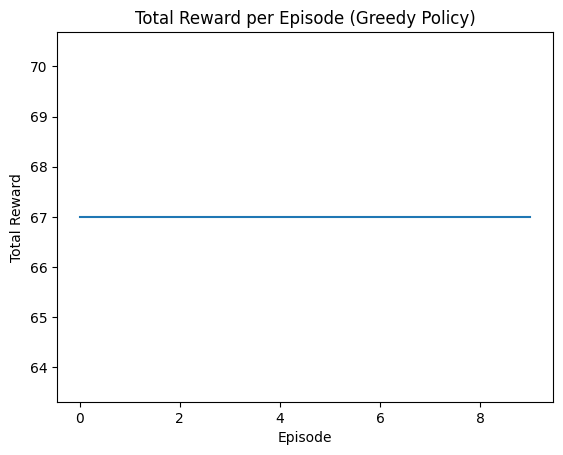

Training for gamma=0.9, max_timestamp=20
Average Reward: 75.1988
Average Penalties: 0.0
Average Steps: 20.0
Evaluation for gamma=0.9, max_timestamp=20
Trained Q-table 1:
[[ 3.99625468e+01  4.45138381e+01  4.63271586e+01  4.10450600e+01]
 [ 2.32697316e+01  3.25580359e+01  4.25200053e+01  3.45462017e+01]
 [ 3.35245331e+01  3.32602749e+01  4.61999682e+01  2.92818020e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.23233404e+00  6.96224874e+00  3.02042309e+01  1.68942175e+00]
 [ 1.30241959e+01  1.22490854e+01  3.48973752e+01  7.58585493e+00]
 [ 1.75213322e+01  2.35320469e+01  4.11101987e+01  1.17872765e+01]
 [ 4.61225700e+01  3.65898587e+01  3.07905286e+01  2.61323858e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 7.34210764e+00  2.20625188e-01  2.97478635e+01  1.05769996e+01]
 [ 8.71677538e+00  2.08145056e+01  4.24859363e+01  1.09835901e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.50000000e-02  2.30174

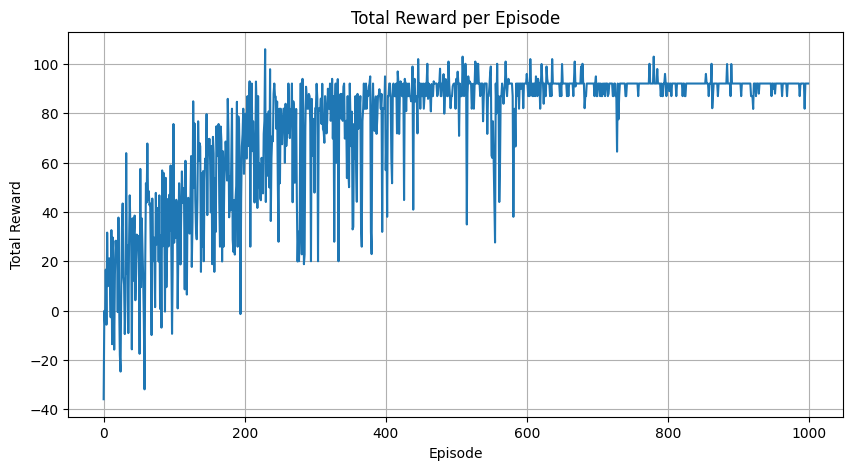

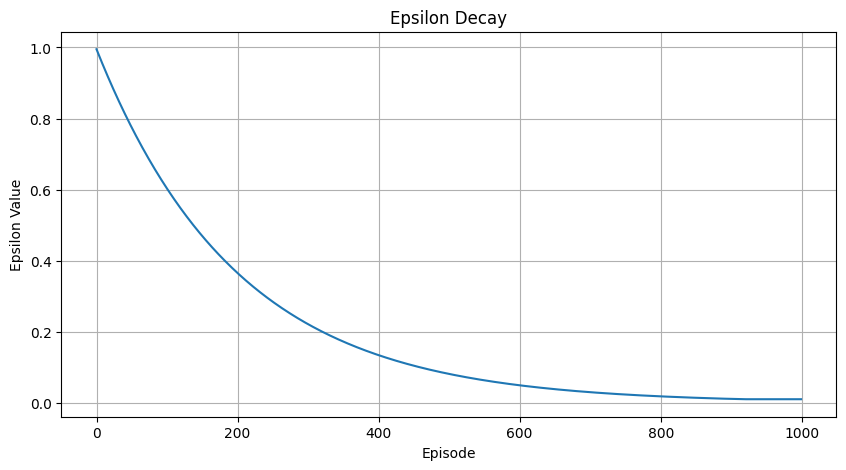

Episode 1 Reward: 92
Episode 2 Reward: 92
Episode 3 Reward: 92
Episode 4 Reward: 92
Episode 5 Reward: 92
Episode 6 Reward: 92
Episode 7 Reward: 92
Episode 8 Reward: 92
Episode 9 Reward: 92
Episode 10 Reward: 92
Average Reward over 10 episodes: 92.0


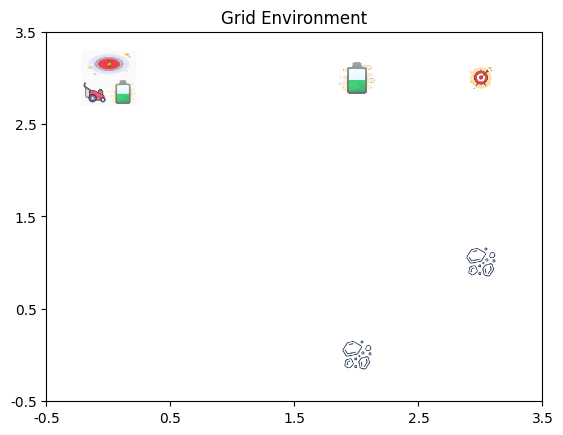

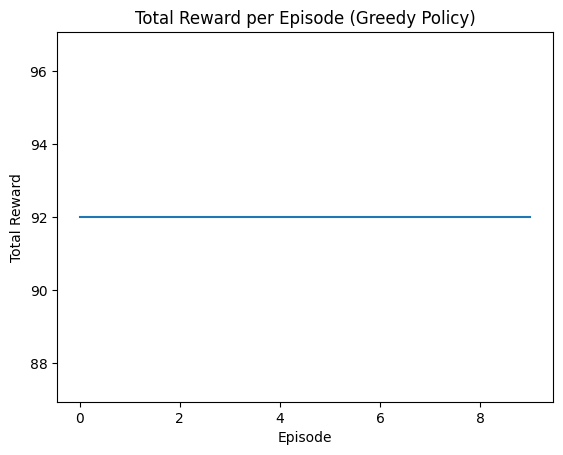

Training for gamma=0.995, max_timestamp=12
Average Reward: 43.2045
Average Penalties: 0.0
Average Steps: 12.0
Evaluation for gamma=0.995, max_timestamp=12
Trained Q-table 1:
[[ 3.53746379e+02  4.40919758e+02  5.80338532e+02  4.47898738e+02]
 [ 4.83760402e+01  1.33657438e+02  5.68886530e+02  2.35675395e+02]
 [ 1.02713408e+02  1.60508214e+02  5.74912493e+02  2.13600174e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.53811278e+00  2.69381415e+02  2.35389082e+00  4.83866044e+00]
 [ 4.03470344e+00  1.52849974e+02  1.39126918e+01  5.84967437e+00]
 [ 2.06554605e+01  1.74410503e+01  1.73762305e+02  1.24280360e+01]
 [ 4.53629630e+02  7.42471581e+01  3.20686770e+01  1.79041064e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.21701452e+00  1.04971833e+00  1.51541714e+01  9.31991859e+00]
 [ 1.30060133e+00  1.33746957e+01  8.31937246e+01  2.70912950e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.12165159e-02  3.9

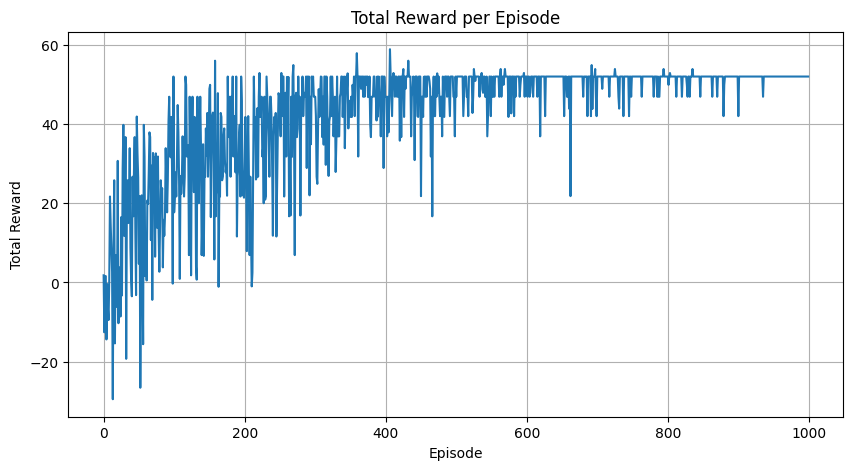

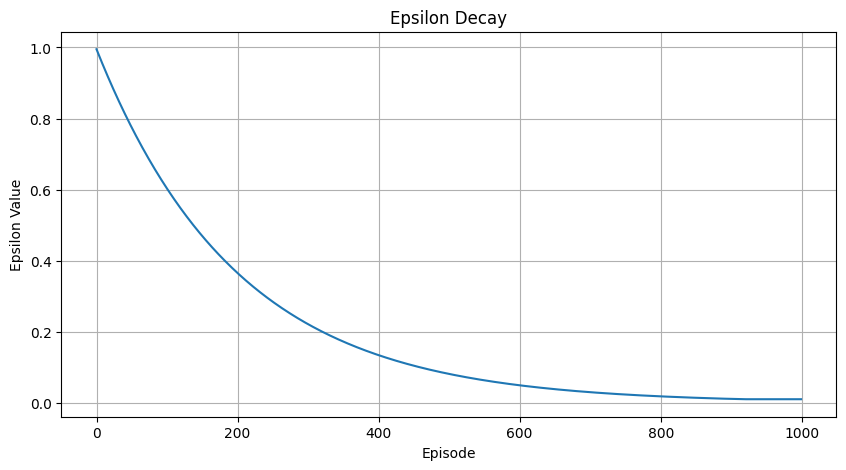

Episode 1 Reward: 52
Episode 2 Reward: 52
Episode 3 Reward: 52
Episode 4 Reward: 52
Episode 5 Reward: 52
Episode 6 Reward: 52
Episode 7 Reward: 52
Episode 8 Reward: 52
Episode 9 Reward: 52
Episode 10 Reward: 52
Average Reward over 10 episodes: 52.0


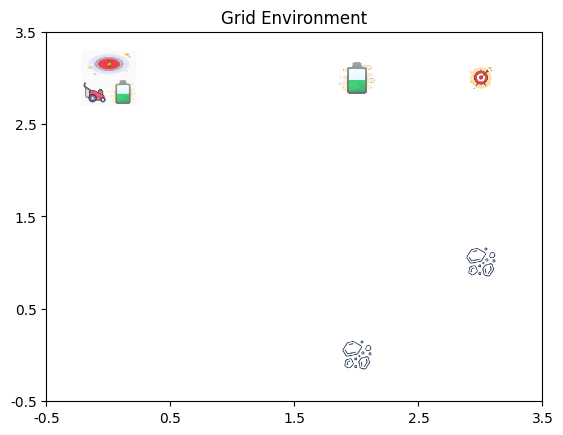

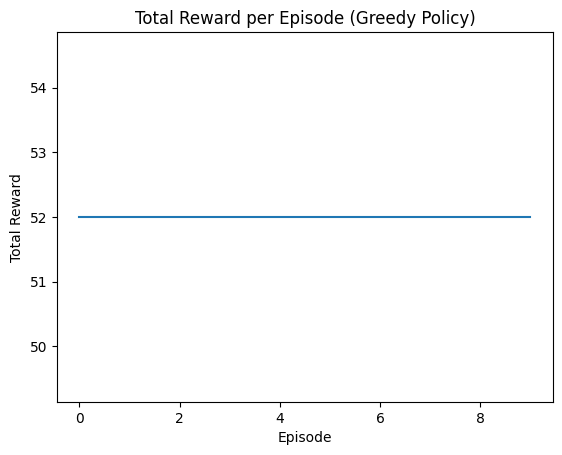

Training for gamma=0.995, max_timestamp=15
Average Reward: 23.6874
Average Penalties: 0.0
Average Steps: 14.75
Evaluation for gamma=0.995, max_timestamp=15
Trained Q-table 1:
[[ 2.47707947e+02  1.79127156e+02  1.59660385e+02  1.34991412e+02]
 [ 1.47680958e+02  3.63057836e+01  4.70163462e+01  1.74358210e+01]
 [ 1.72021663e+01  1.50197836e+01  1.47886950e+02  1.70619402e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.36844804e+01  8.15324700e+01  2.36782023e+02  4.54874232e+01]
 [ 3.94581120e+01  7.44525088e+01  2.40229415e+02  5.43829519e+01]
 [ 5.30681177e+01  5.45148132e+01  2.47562891e+02  1.15678663e+02]
 [ 1.43610757e+02  2.45805092e+02  1.30854733e+02  1.28149654e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.56922337e+01  1.55903330e+01  6.25795618e+01  1.14021945e+01]
 [ 4.07638216e+00  1.30527305e+01  1.36054811e+02  1.27709188e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.72978963e-01  6.

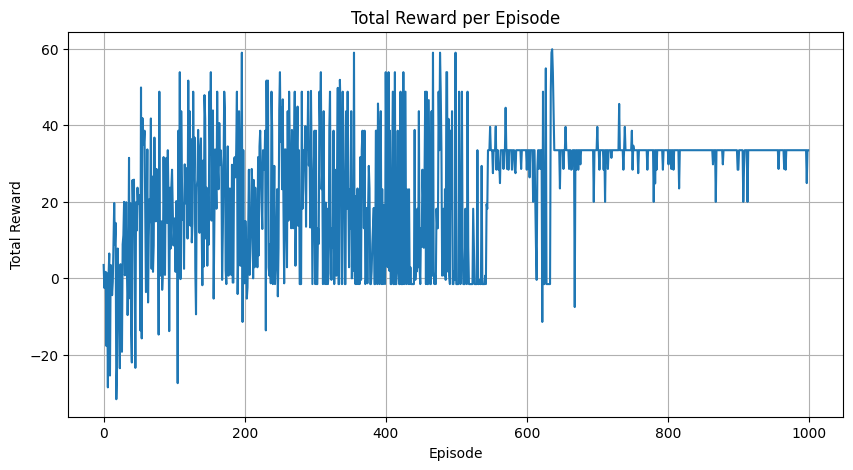

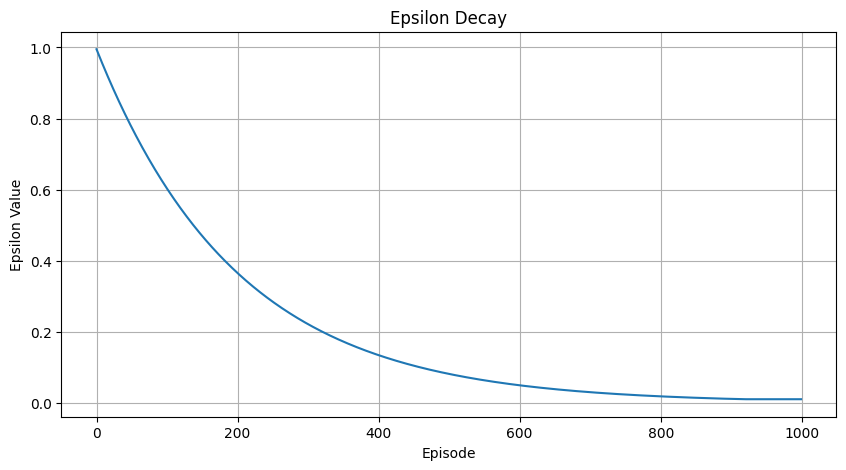

Episode 1 Reward: 33.5
Episode 2 Reward: 33.5
Episode 3 Reward: 33.5
Episode 4 Reward: 33.5
Episode 5 Reward: 33.5
Episode 6 Reward: 33.5
Episode 7 Reward: 33.5
Episode 8 Reward: 33.5
Episode 9 Reward: 33.5
Episode 10 Reward: 33.5
Average Reward over 10 episodes: 33.5


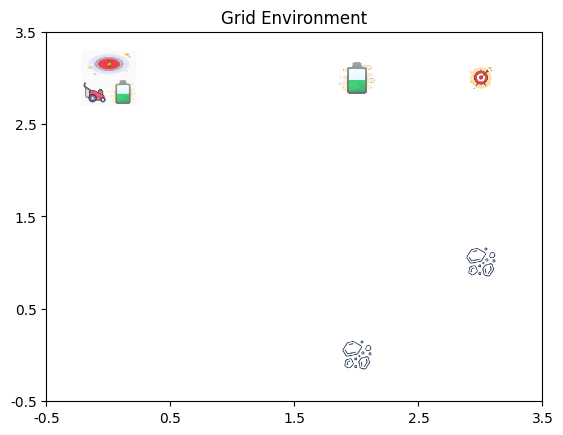

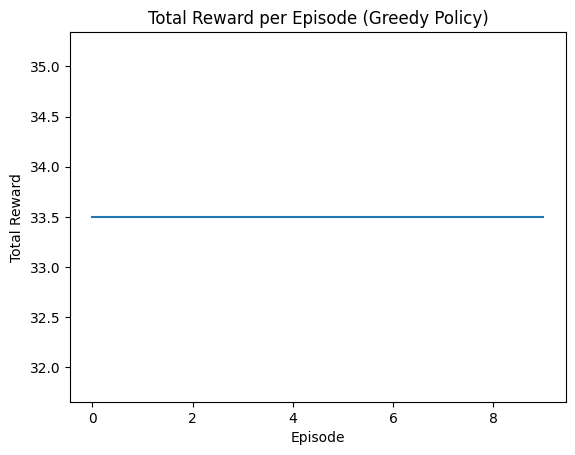

Training for gamma=0.995, max_timestamp=20
Average Reward: 66.5946
Average Penalties: 0.0
Average Steps: 20.0
Evaluation for gamma=0.995, max_timestamp=20
Trained Q-table 1:
[[ 4.90336486e+02  6.51358428e+02  7.39460194e+02  6.08951838e+02]
 [ 9.21502134e+01  2.59382522e+02  7.26313263e+02  1.17155051e+02]
 [ 7.81346394e+01  2.81871525e+02  7.32546584e+02  3.09594165e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.06780513e+02  2.72841310e+02  4.78005502e+01  8.99820117e+01]
 [ 4.22593726e+00  2.69431911e+02  4.62627289e+01  1.85341317e+01]
 [ 2.20319637e+01  2.07246932e+01  2.45746806e+02  1.67748880e+01]
 [ 6.24119398e+02  7.52469722e+01  1.40732324e+02  7.15408159e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.19864593e+00  8.86558686e+00  2.77370133e+01  7.90073652e+00]
 [ 9.39138158e+00  1.13873853e+01  2.32941165e+02  4.45311878e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.01103814e-01  3.2

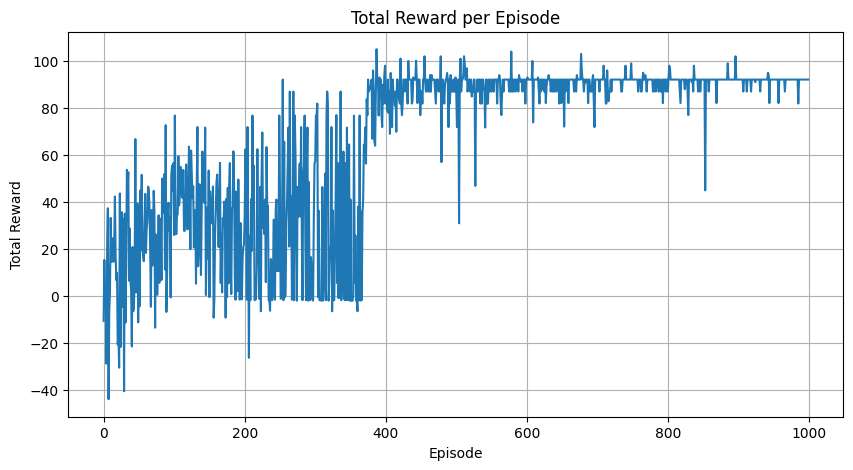

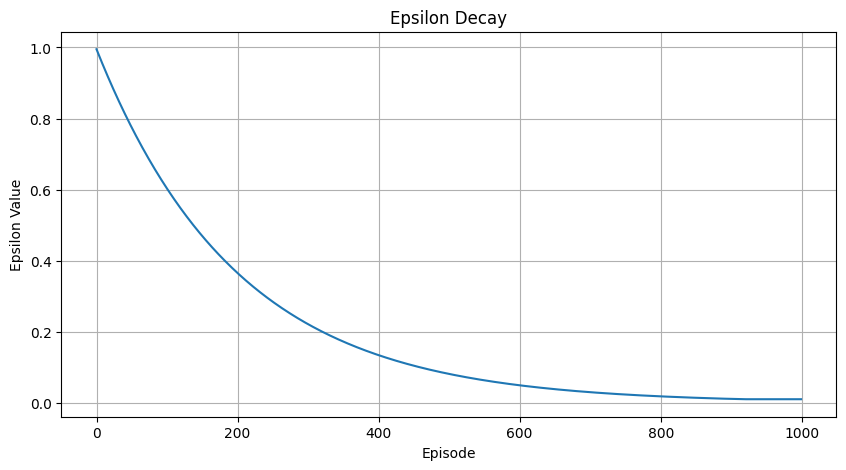

Episode 1 Reward: 92
Episode 2 Reward: 92
Episode 3 Reward: 92
Episode 4 Reward: 92
Episode 5 Reward: 92
Episode 6 Reward: 92
Episode 7 Reward: 92
Episode 8 Reward: 92
Episode 9 Reward: 92
Episode 10 Reward: 92
Average Reward over 10 episodes: 92.0


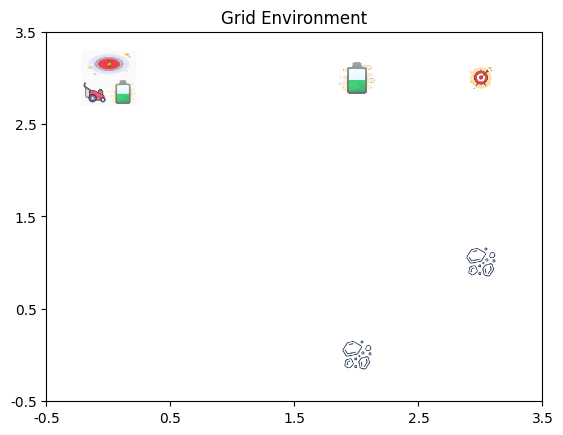

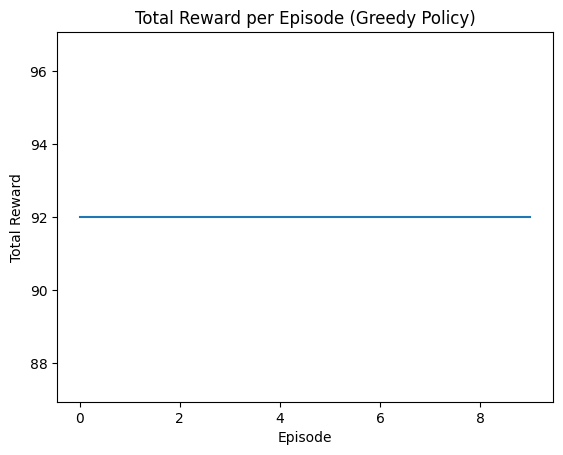

Training for gamma=0.99, max_timestamp=12
Average Reward: 41.996399999999994
Average Penalties: 0.0
Average Steps: 12.0
Evaluation for gamma=0.99, max_timestamp=12
Trained Q-table 1:
[[ 2.53453699e+02  3.10608436e+02  3.82977708e+02  3.13616050e+02]
 [ 8.84261138e+01  1.38940041e+02  3.76043924e+02  1.68825458e+02]
 [ 1.13387947e+02  1.55583026e+02  3.80022279e+02  1.26401273e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.06854746e+01  2.05326171e+02  1.74242659e+01  1.37041143e+01]
 [ 3.61354308e+00  1.59555271e+02  8.16863452e+00  1.83602145e+01]
 [ 1.81149430e+01  1.50543172e+01  2.21365013e+02  6.55985952e+00]
 [ 7.20388895e+01  3.25162042e+02  6.50147839e+01  1.26829267e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.94803853e+00  1.20781633e+00  1.83740289e+01  3.15308459e+00]
 [ 1.42860236e+00  5.75559911e+00  6.62510354e+01 -2.63446161e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.00491281

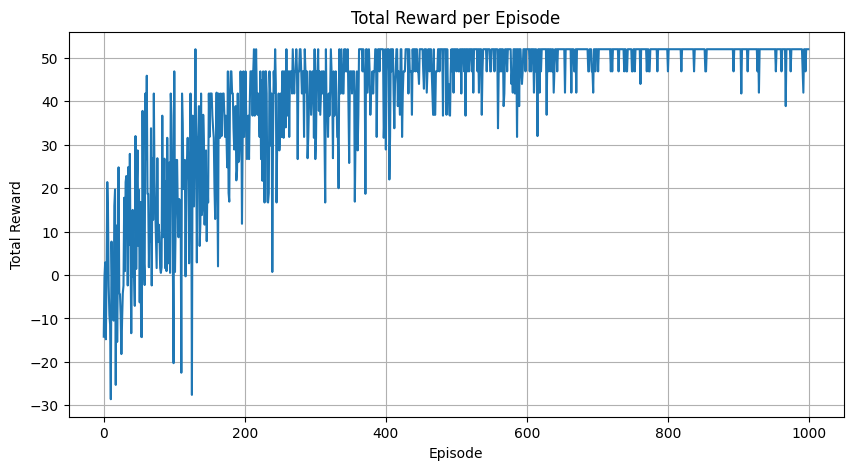

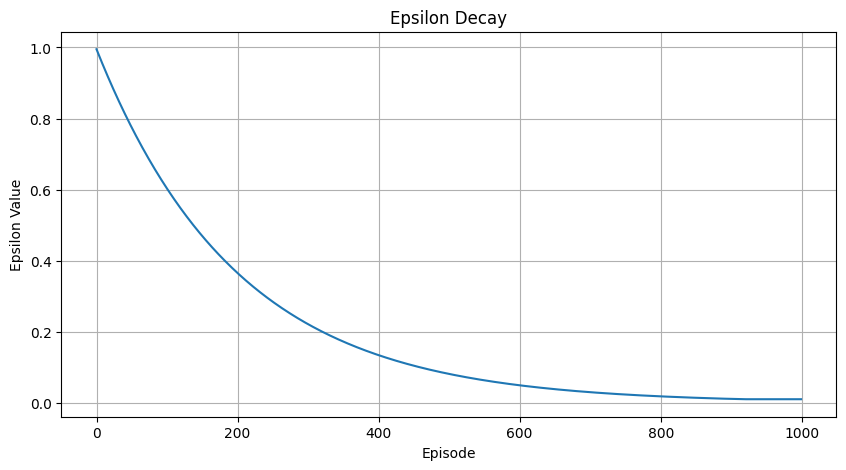

Episode 1 Reward: 52
Episode 2 Reward: 52
Episode 3 Reward: 52
Episode 4 Reward: 52
Episode 5 Reward: 52
Episode 6 Reward: 52
Episode 7 Reward: 52
Episode 8 Reward: 52
Episode 9 Reward: 52
Episode 10 Reward: 52
Average Reward over 10 episodes: 52.0


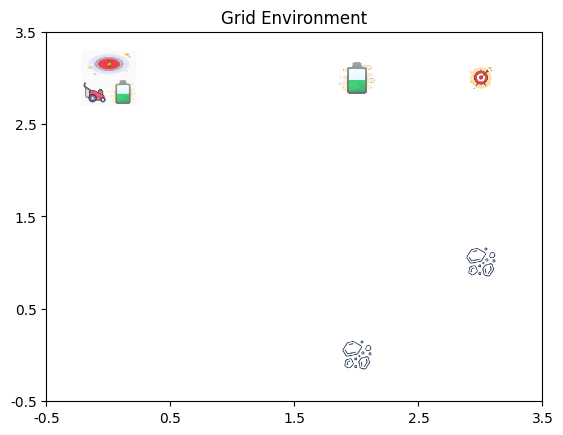

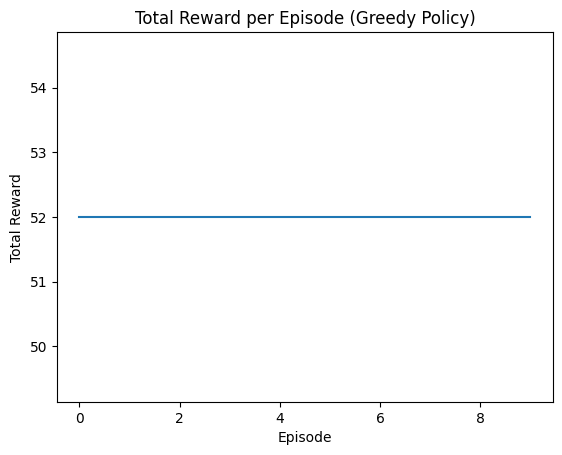

Training for gamma=0.99, max_timestamp=15
Average Reward: 52.26579999999999
Average Penalties: 0.0
Average Steps: 15.0
Evaluation for gamma=0.99, max_timestamp=15
Trained Q-table 1:
[[ 2.34036503e+02  2.92839891e+02  3.88596982e+02  2.78572598e+02]
 [ 3.12230489e+01  1.39852198e+02  3.79318977e+02  1.23129924e+02]
 [ 8.23677825e+01  1.62602021e+02  3.85230286e+02  1.47523313e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.32877036e+02  1.76280703e+01  9.71692072e+00  5.73257782e+00]
 [ 6.91456963e+01  8.76270865e+00  3.44261963e+00  7.78111872e+00]
 [ 2.66741638e+01  7.53028840e+00  1.38421242e+02  1.08166612e+01]
 [ 8.80158331e+01  3.19402462e+02  3.58602254e+01  3.83567016e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.00254736e+01  7.96814501e+00  1.24981844e+02  1.62701641e+01]
 [ 7.60076060e+00  3.06786267e+01  1.95053925e+02  3.69210582e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.84550877e

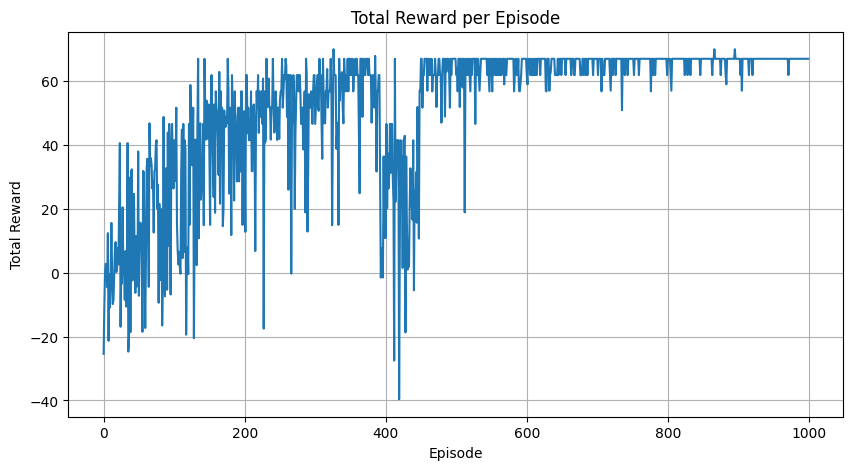

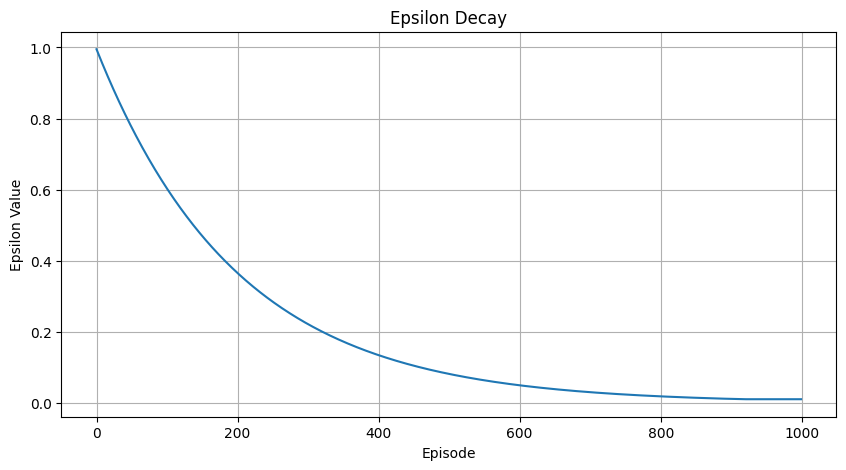

Episode 1 Reward: 67
Episode 2 Reward: 67
Episode 3 Reward: 67
Episode 4 Reward: 67
Episode 5 Reward: 67
Episode 6 Reward: 67
Episode 7 Reward: 67
Episode 8 Reward: 67
Episode 9 Reward: 67
Episode 10 Reward: 67
Average Reward over 10 episodes: 67.0


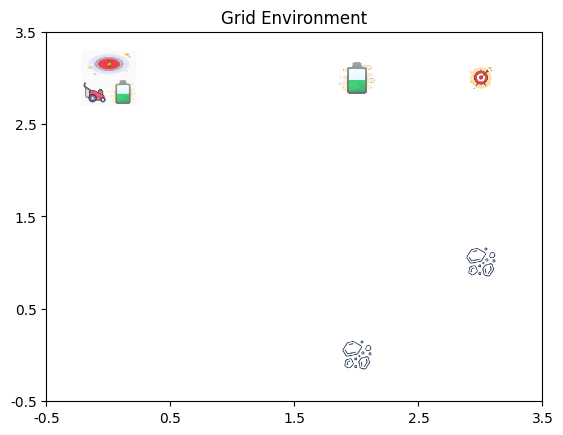

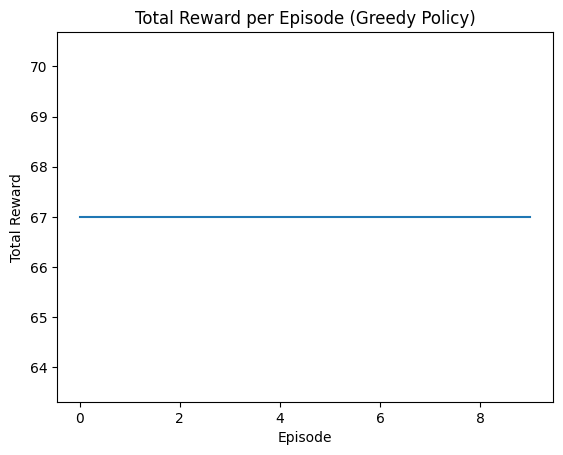

Training for gamma=0.99, max_timestamp=20
Average Reward: 76.4679
Average Penalties: 0.0
Average Steps: 20.0
Evaluation for gamma=0.99, max_timestamp=20
Trained Q-table 1:
[[ 4.06550366e+02  4.19725758e+02  4.46148951e+02  4.17029995e+02]
 [ 9.16399275e+01  2.27426716e+02  4.41790945e+02  2.79610403e+02]
 [ 2.28175422e+02  2.52934214e+02  4.46255184e+02  2.45329128e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.93535155e+01  2.82891350e+02  8.94362185e+00  1.58144135e+01]
 [ 1.99547183e+01  2.38567842e+02  1.28407081e+01  2.95914089e+01]
 [ 6.30674412e+01  4.70193250e+01  3.00461450e+02  1.93886491e+01]
 [ 4.26865717e+02  9.06048246e+01  1.25684941e+02  1.19149730e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.38446269e+01  6.85636437e+00  4.99307535e+01  6.78439814e+00]
 [ 8.12845169e+00  6.35680837e+00  2.97325738e+02  1.82238434e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.62630788e-01  3.618

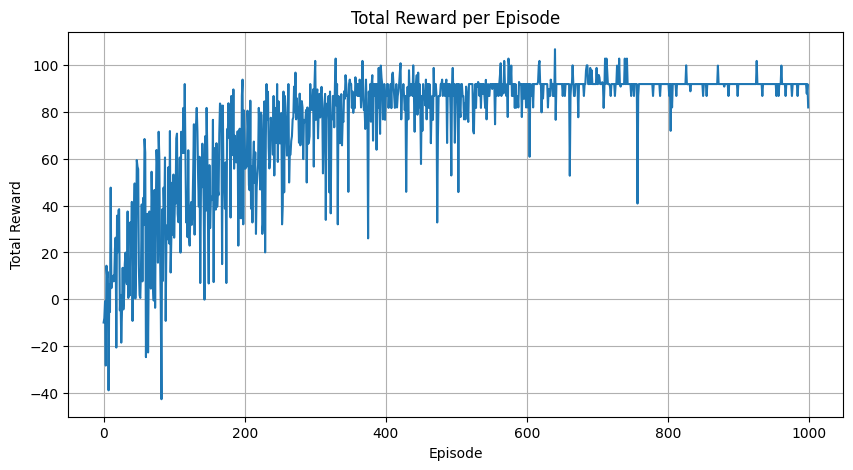

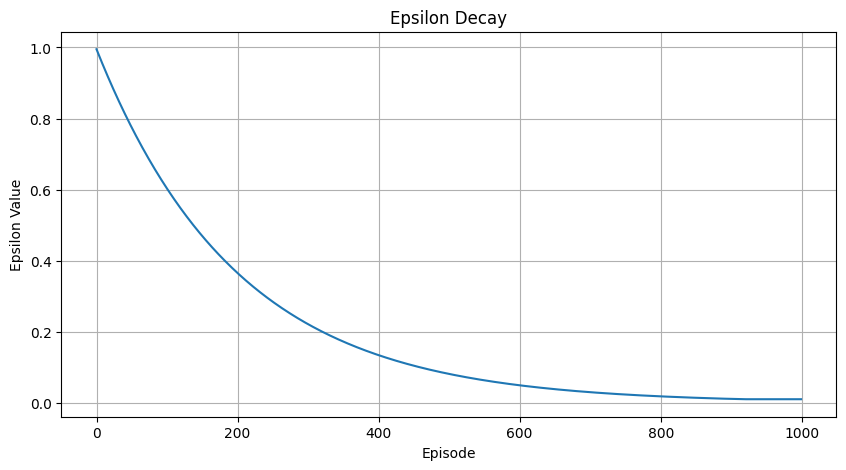

Episode 1 Reward: 92
Episode 2 Reward: 92
Episode 3 Reward: 92
Episode 4 Reward: 92
Episode 5 Reward: 92
Episode 6 Reward: 92
Episode 7 Reward: 92
Episode 8 Reward: 92
Episode 9 Reward: 92
Episode 10 Reward: 92
Average Reward over 10 episodes: 92.0


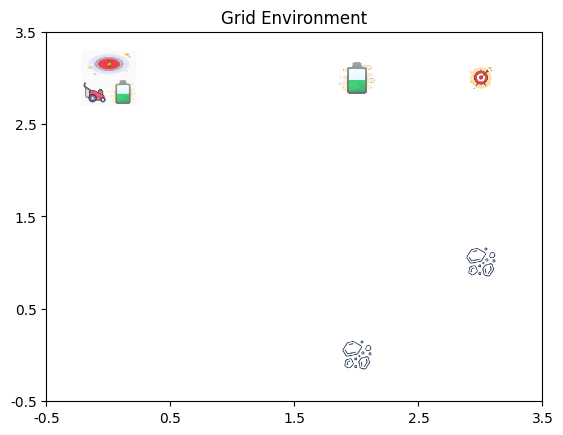

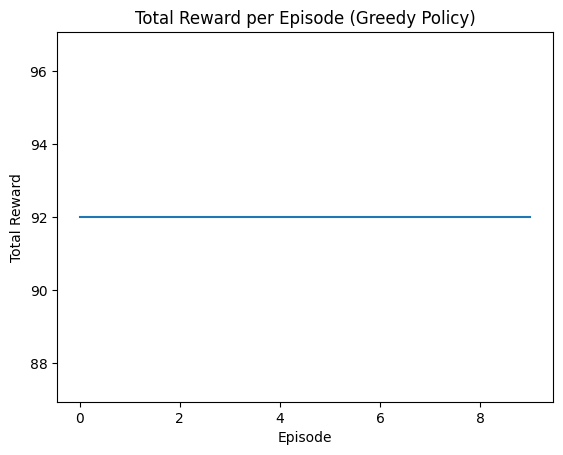

In [ ]:
gamma_values = [0.9, 0.995, 0.99]
max_timestamp_values = [12, 15, 20]

for gamma in gamma_values:
    for mt in max_timestamp_values:
        env = MyLawn(gamma=gamma, alpha=0.15, max_timestamp=mt)
        print(f"Training for gamma={gamma}, max_timestamp={mt}")
        rewards_epi, epsilon_values, avg_penalty, average_steps, qt1, qt2, final_state = training_loop(env, gamma, mt)
        print(f"Average Reward: {np.mean(rewards_epi)}")
        print(f"Average Penalties: {avg_penalty}")
        print(f"Average Steps: {average_steps}")
        evaluate_loop(env, mt, gamma, qt1, qt2, rewards_epi, epsilon_values, final_state)

In [ ]:
best_gamma, best_mt = max(performance_dict, key=performance_dict.get)
print(f"Best Time Stamp: {best_mt}, Best Gamma: {best_gamma}")

Best Time Stamp: 20, Best Gamma: 0.99
